# Principal component analysis

This notebook discusses **principal component analysis** (PCA) for dimensionality reduction. There are many great explanations of this standard technique in multivariate statistics and machine learning, including the textbook classics [[Jackson, 1991](https://doi.org/10.1002/0471725331), [Jolliffe, 2002](https://doi.org/10.1007/b98835)]. Herein we loosely follow the introduction in the last chapter of [[Nagel, 2017](https://doi.org/10.3929/ethz-a-010835772)]. After a brief theoretical summary, an experiment based on MNIST image data serves as a practical demonstration.

## Population PCA

We start with the **population PCA** or **discrete Karhunen-Loève expansion** of a $D$-dimensional random vector $\boldsymbol{X}$ with mean $\boldsymbol{\mu} = \mathbb{E}[\boldsymbol{X}]$ and covariance matrix $\boldsymbol{\Sigma} = \mathrm{Cov}[\boldsymbol{X}] = \mathbb{E}[(\boldsymbol{X} - \boldsymbol{\mu})(\boldsymbol{X} - \boldsymbol{\mu})^\top]$. Because $\boldsymbol{\Sigma}$ is symmetric and positive definite, there are linearly independent eigenvectors $\boldsymbol{\phi}_i$ and positive eigenvalues $\lambda_i$ for $i=1,\ldots,D$ with
$$
\boldsymbol{\Sigma} \boldsymbol{\phi}_i = \lambda_i \boldsymbol{\phi}_i.
$$
It is assumed that eigenvalues are ordered such that $\lambda_1 \geq \ldots \geq \lambda_D$. While characteristic vectors pertaining to different eigenvalues $\lambda_i \neq \lambda_j$ for $i \neq j$ are orthogonal, for degenerate values they can be easily orthogonalized. One then has $\boldsymbol{\phi}_i^\top \boldsymbol{\phi}_j = \delta_{ij}$ for $i,j=1,\ldots,D$. Disregarding degeneracy, the eigenvectors are uniquely defined up to a change of sign.

One can now define the orthogonal matrix $\boldsymbol{\Phi} = (\boldsymbol{\phi}_1,\ldots \boldsymbol{\phi}_D)$ with $\boldsymbol{\Phi}^\top \boldsymbol{\Phi} = \boldsymbol{\Phi} \boldsymbol{\Phi}^\top = \boldsymbol{I}$. Its columns are the eigenvectors that form a basis of the full data space. The covariance matrix is diagonalized by
$$
\boldsymbol{\Lambda} = \boldsymbol{\Phi}^\top \boldsymbol{\Sigma} \boldsymbol{\Phi} =
\begin{pmatrix}
\lambda_1 & 0 & \ldots & 0 \\
0 & \lambda_2 & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & \lambda_D \\
\end{pmatrix}.
$$
The other way around, one obtains the spectral eigendecomposition of the covariance matrix $\boldsymbol{\Sigma} = \boldsymbol{\Phi} \boldsymbol{\Lambda} \boldsymbol{\Phi}^\top = \sum_{i=1}^D \lambda_i \boldsymbol{\phi}_i \boldsymbol{\phi}_i^\top$. One can orthogonally transform the original random vector as follows
$$
\boldsymbol{Z} = \boldsymbol{\Phi}^\top (\boldsymbol{X} - \boldsymbol{\mu}).
$$
Following this, the random vector is centered with mean $\mathbb{E}[\boldsymbol{Z}] = \boldsymbol{0}$ and decorrelated with the diagonal covariance $\mathrm{Cov}[\boldsymbol{Z}] = \mathbb{E}[\boldsymbol{Z} \boldsymbol{Z}^\top] = \boldsymbol{\Lambda}$. While this implies independence in the Gaussian case, this does not generally hold true. The backtransformation is
$$
\boldsymbol{X} = \boldsymbol{\mu} + \boldsymbol{\Phi} \boldsymbol{Z} =
\boldsymbol{\mu} + \sum_{i=1}^D Z_i \boldsymbol{\phi}_i.
$$
The random variables $Z_i = \boldsymbol{\phi}_i^\top (\boldsymbol{Y} - \boldsymbol{\mu})$ for $i=1,\ldots,D$ are referred to as the **principle components**. In the equation above, the original random vector has been represented in terms of those zero-mean and uncorrelated components.

One can now consider the sum $\sum_{i=1}^D \mathrm{Var}[X_i] = \mathrm{tr}(\boldsymbol{\Sigma})$ of all component variances. As a consequence of the invariance of the trace under cyclic permutation, this so-called **total variance** is preserved under the orthogonal transformation. This can be seen by writing
$$
\sum_{i=1}^D \mathrm{Var}[X_i] = \mathrm{tr}(\boldsymbol{\Sigma}) =
\mathrm{tr}(\boldsymbol{\Lambda}) = \sum_{i=1}^D \mathrm{Var}[Z_i] = \sum_{i=1}^D \lambda_i.
$$
Recall that the eigenvalues, and thus the variances of the principal components, are arranged in decreasing order. One can truncate the series and keep only its first $D^\prime$ terms with $1\leq D^\prime \leq D$ . With $\hat{\boldsymbol{\Phi}} = (\boldsymbol{\phi}_1,\ldots \boldsymbol{\phi}_{D^\prime})$ and $\hat{\boldsymbol{Z}} = \hat{\boldsymbol{\Phi}}^\top (\boldsymbol{X} - \boldsymbol{\mu})$ one obtains a variance-optimal approximation or reconstruction $\hat{\boldsymbol{X}} = \boldsymbol{\mu} + \hat{\boldsymbol{\Phi}} \hat{\boldsymbol{Z}} = \boldsymbol{\mu} + \sum_{i=1}^{D^\prime} Z_i \boldsymbol{\phi}_i$ of the original random vector. Most of the total variance is retained with $D^\prime$ terms.

One can see that the reconstruction error of $\hat{\boldsymbol{X}} = \boldsymbol{\mu} + \hat{\boldsymbol{\Phi}} \hat{\boldsymbol{\Phi}}^\top (\boldsymbol{X} - \boldsymbol{\mu})$ is given as $\boldsymbol{X} - \hat{\boldsymbol{X}} = \sum_{i=D^\prime+1}^D Z_i \boldsymbol{\phi}_i$. Therefore, one has $\lVert \boldsymbol{X} - \hat{\boldsymbol{X}} \rVert^2 = (\boldsymbol{X} - \hat{\boldsymbol{X}})^\top (\boldsymbol{X} - \hat{\boldsymbol{X}}) = \sum_{i=D^\prime+1}^D Z_i^2$. Preserving most of the total variance corresponds to minimizing the expected squared reconstruction error. This becomes evident from
$$
\mathbb{E} \left[ \lVert \boldsymbol{X} - \hat{\boldsymbol{X}} \rVert^2 \right] =
\sum_{i=D^\prime+1}^D \mathbb{E}[Z_i^2] =
\sum_{i=D^\prime+1}^D \mathrm{Var}[Z_i] = \sum_{i=D^\prime+1}^D \lambda_i.
$$
As an alternative to the construction based on the covariance matrix eigendecomposition, it is in fact possible to define PCA as the solution to a series of optimization problems. They are related to the minimization of the expected reconstruction error $\mathbb{E}[\lVert \boldsymbol{X} - \hat{\boldsymbol{X}} \rVert^2] = \mathbb{E}[\lVert (\boldsymbol{X} - \boldsymbol{\mu}) - \hat{\boldsymbol{\Phi}} \hat{\boldsymbol{\Phi}}^\top (\boldsymbol{X} - \boldsymbol{\mu}) \rVert^2]$ with respect to a suitable transformation subject to $\hat{\boldsymbol{\Phi}}^\top \hat{\boldsymbol{\Phi}} = \boldsymbol{I}$.

This also highlights a connection to autoencoders. The emerging latent variables of the autoencoder are neither generally ordered according to the variance nor decorrelated. For a linear encoder and decoder, that are symmetric with tied weights, and a mean squared reconstruction loss, they should span the same subspace though.

## Sample PCA

Above, the population PCA has been applied to a random vector. Its mechanisms remain intact when being applied to an actual set of data. Instead of the exact mean and covariance matrix, their empirical counterparts enter the construction of the **sample PCA**. In particular, the sample covariance is eigendecomposed and the principal components emerge as projections on the eigenvectors.

Assume that we have independent realizations $\boldsymbol{x}^{(n)}$ for $n=1,\ldots,N$ of our $D$-dimensional random vector. The empirical mean of each component has been subtracted, hence, all variables are already centered. As usual, the observations are then collected into the $N \times D$-shaped data matrix
$$
\mathcal{X} =
\begin{pmatrix}
{\boldsymbol{x}^{(1)}}^\top \\
{\boldsymbol{x}^{(2)}}^\top \\
\vdots \\
{\boldsymbol{x}^{(N)}}^\top \\
\end{pmatrix} =
\begin{pmatrix}
x_1^{(1)} & x_2^{(1)} & \ldots & x_D^{(1)} \\
x_1^{(2)} & x_2^{(2)} & \ldots & x_D^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
x_1^{(N)} & x_2^{(N)} & \ldots & x_D^{(N)}
\end{pmatrix}.
$$

The representation of the data items in terms of the first $D^\prime$ principal components is given as $\hat{\boldsymbol{z}}^{(n)} = \hat{\boldsymbol{\Phi}}^\top \boldsymbol{x}^{(n)}$. The correspondingly reconstructed data point is $\hat{\boldsymbol{x}}^{(n)} = \hat{\boldsymbol{\Phi}} \hat{\boldsymbol{z}}^{(n)}$.
One might summarize this by writing $\hat{\mathcal{Z}} = \mathcal{X} \hat{\boldsymbol{\Phi}}$ and $\hat{\mathcal{X}} = \hat{\mathcal{Z}} \hat{\boldsymbol{\Phi}}^\top$. Here, we have introduced the matrix
$$
\mathcal{Z} =
\begin{pmatrix}
{\hat{\boldsymbol{z}}^{(1)}}^\top \\
{\hat{\boldsymbol{z}}^{(2)}}^\top \\
\vdots \\
{\hat{\boldsymbol{z}}^{(N)}}^\top \\
\end{pmatrix} =
\begin{pmatrix}
z_1^{(1)} & z_2^{(1)} & \ldots & z_{D^\prime}^{(1)} \\
z_1^{(2)} & z_2^{(2)} & \ldots & z_{D^\prime}^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
z_1^{(N)} & z_2^{(N)} & \ldots & z_{D^\prime}^{(N)}
\end{pmatrix}.
$$

One can now validate the optimality properties of the sample PCA. To that end, one may start by investigating the compression of $\mathcal{X}$ into $\mathcal{Z}$ and its subsequent reconstruction as $\hat{\mathcal{X}} = \mathcal{X} \hat{\boldsymbol{\Phi}} \hat{\boldsymbol{\Phi}}^\top$. The average reconstruction error can be written with the Frobenius matrix norm $\lVert \cdot \rVert_F$ as
$$
\frac{1}{N} \lVert \mathcal{X} - \hat{\mathcal{X}} \rVert_F^2 =
\frac{1}{N} \lVert \mathcal{X} - \mathcal{X} \hat{\boldsymbol{\Phi}} \hat{\boldsymbol{\Phi}}^\top \rVert_F^2.
$$
With $\lVert \mathcal{X} - \mathcal{X} \hat{\boldsymbol{\Phi}} \hat{\boldsymbol{\Phi}}^\top \rVert_F^2 = \mathrm{const}(\mathcal{X}) - \mathrm{tr}(\hat{\boldsymbol{\Phi}}^\top \mathcal{X}^\top \mathcal{X} \hat{\boldsymbol{\Phi}})$, where $\boldsymbol{\Sigma} = \mathcal{X}^\top \mathcal{X} / (N-1)$ is the sample covariance of the data, one sees that the minimal reconstruction error corresponds to the maximal $\mathrm{tr}(\hat{\boldsymbol{\Phi}}^\top \boldsymbol{\Sigma} \hat{\boldsymbol{\Phi}})$. Here, $\hat{\boldsymbol{\Phi}}^\top \boldsymbol{\Sigma} \hat{\boldsymbol{\Phi}}$ is exactly the empirical covariance of the transformed variables, which optimally is diagonal with decreasing entries. It is now easy to see that the sample PCA features the empirical variants of the population PCA optimalities.

## Demonstration

A small demonstration of PCA applied to MNIST is provided hereafter. The implementation of the machine learning library scikit-learn is relied on. It is remarked that PyTorch and torchvision are only imported in order to ease the data loading. There is no usage of autograd or GPU computations.

In [1]:
%matplotlib inline

In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.decomposition import PCA

In [3]:
_ = torch.manual_seed(666666)

### MNIST data

The MNIST data set is imported as a first step. After this familiar-looking procedure, the grayscale images have [0,1]-valued pixels.

In [4]:
data_path = Path.home() / 'Data'

train_set = datasets.MNIST(
    data_path,
    train=True,
    transform= transforms.ToTensor(),
    download=True
)

test_set = datasets.MNIST(
    data_path,
    train=False,
    transform= transforms.ToTensor(),
    download=True
)

print('No. train images:', len(train_set))
print('No. test images:', len(test_set))

No. train images: 60000
No. test images: 10000


In [5]:
batch_size = 64

train_loader = DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    test_set,
    batch_size=batch_size,
    shuffle=False
)

print('No. train batches:', len(train_loader))
print('No. test batches:', len(test_loader))

No. train batches: 938
No. test batches: 157


As the next step, we focus only on images showing the digit six. The images are flattened in order to obtain the feature vectors.

In [6]:
def extract_digits(data_loader, digit):
    '''Extract all images showing a certain digit.'''
    images = []
    for X_batch, y_batch in data_loader:
        images.append(X_batch[y_batch==digit])
    images = torch.cat(images, dim=0)
    return images

In [7]:
digit = 6

train_features = extract_digits(train_loader, digit).numpy().reshape((-1, 28*28))
test_features = extract_digits(test_loader, digit).numpy().reshape((-1, 28*28))

print('No. train images ({}): {}'.format(digit, len(train_features)))
print('No. test images ({}): {}'.format(digit, len(test_features)))

No. train images (6): 5918
No. test images (6): 958


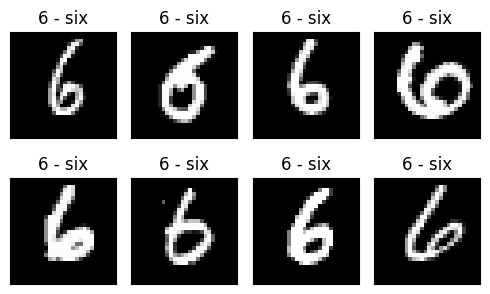

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(5, 3.2))
for idx, ax in enumerate(axes.ravel()):
    image = train_features[idx].reshape((28, 28))
    ax.imshow(image, cmap='gray', vmin=0, vmax=1)
    ax.set_title(train_set.classes[digit])
    ax.set(xticks=[], yticks=[], xlabel='', ylabel='')
fig.tight_layout()

### Standard PCA

A PCA involving 50 components is performed on the training set. The proportion of the preserved total variance is investigated.

In [9]:
pca = PCA(n_components=50).fit(train_features)
print('Retained total var.: {:.2f}%'.format(100*pca.explained_variance_ratio_.sum()))

Retained total var.: 87.76%


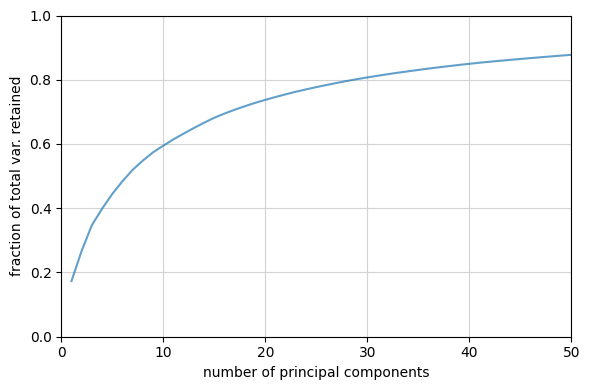

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(pca.n_components)+1, pca.explained_variance_ratio_.cumsum(), alpha=0.7)
ax.set(xlabel='number of principal components', ylabel='fraction of total var. retained')
ax.set_xlim((0, pca.n_components))
ax.set_ylim((0, 1))
ax.grid(visible=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.tight_layout()

The empirical mean of the data is shown below. This average digit arises from reshaping the mean vector of the flattened features.

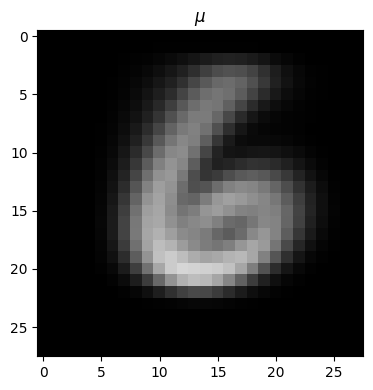

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))
image = pca.mean_.reshape((28, 28))
ax.imshow(image, cmap='gray', vmin=0, vmax=1)
ax.set_title('$\mu$')
fig.tight_layout()

We similarly visualize the eigenvectors pertaining to the first eight principal components. They can have positive and negative entries.

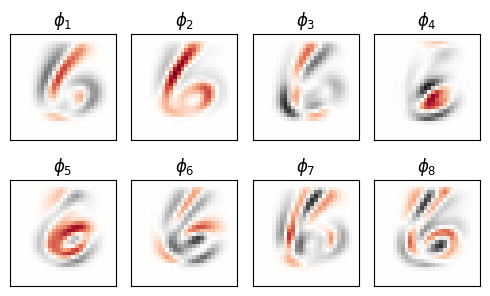

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(5, 3.2))
max_val = np.abs(pca.components_[0:8,:]).max()
for idx, ax in enumerate(axes.ravel()):
    image = pca.components_[idx,:].reshape((28, 28))
    ax.imshow(image, cmap='RdGy', vmin=-max_val, vmax=max_val)
    ax.set_title(idx+1)
    ax.set_title('$\phi_{}$'.format(idx+1))
    ax.set(xticks=[], yticks=[], xlabel='', ylabel='')
fig.tight_layout()

The test data are first reduced and subsequently reconstructed. This works well, even though the pixel value range might not be preserved.

In [13]:
test_components = pca.transform(test_features)
test_reconstructions = pca.inverse_transform(test_components)

print('Original feature shape:', test_features.shape)
print('Reduced dimension shape:', test_components.shape)
print('Reconstructions shape:', test_reconstructions.shape)

Original feature shape: (958, 784)
Reduced dimension shape: (958, 50)
Reconstructions shape: (958, 784)


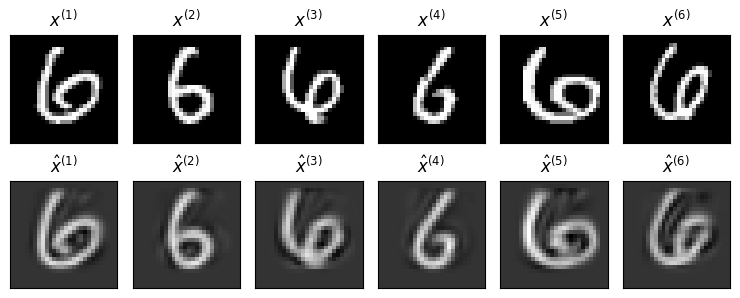

In [14]:
min_val = test_reconstructions[0:12,:].min()
max_val = test_reconstructions[0:12,:].max()

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(7.5, 3.2))
for idx, ax in enumerate(axes[0]):
    image = test_features[idx].reshape((28, 28))
    ax.imshow(image, cmap='gray', vmin=0, vmax=1)
    ax.set_title('$x^{{({})}}$'.format(idx+1))
    ax.set(xticks=[], yticks=[], xlabel='', ylabel='')
for idx, ax in enumerate(axes[1]):
    image = test_reconstructions[idx].reshape((28, 28))
    ax.imshow(image, cmap='gray', vmin=min_val, vmax=max_val)
    ax.set_title('$\\hat{{x}}^{{({})}}$'.format(idx+1))
    ax.set(xticks=[], yticks=[], xlabel='', ylabel='')
fig.tight_layout()